# **8-puzzle on a torus**
This live script finds the solution of the 8-puzzle, using the Dijkstra's 
and the A*(A star) algorithm. The problem is explained next as well as a MATLAB 
function implementing a solution.

The 8-puzzle consists of a frame of numbered square tiles with one tile missing. 
Given some initial configuration of the tiles, the goal is to make sliding moves 
that use the empty space, such that the following configuration is reached:

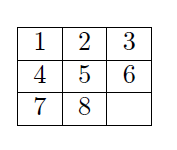

In this live script an alternative version is considered, without the boundaries 
restriction. In particular, there are always four possible sliding moves at 
each step as illustrated next

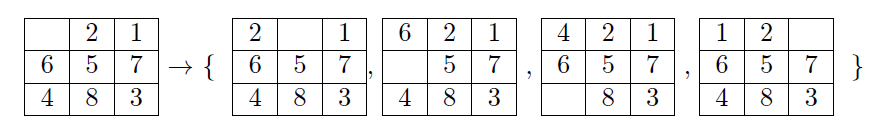



Note that in the usual 8-puzzle game only the first two options of this example 
would be possible, but in the modified version the four options are possible. 
Physically, one can think that the game is played on a torus, as illustrated 
in the figure below, where the forth move option of this example is illustrated.

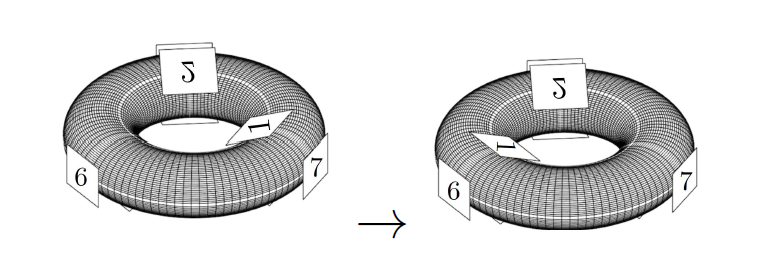

Run the following example; the input argument `initconf` is is a vector with 
9 elements representing the initial configuration such that the number in row 
$i$ and column $j$ appears in position $j + 3(i - 1)$ in this vector; the empty 
tile is represented by $0$. The output `optconfpath` is a matrix with each row 
representing configurations from the initial to the final one. 

In [ ]:
import numpy as np

In [ ]:
def solvepuzzle(initconf):
    optmethod = 'A'  # 'D- Dijkstra' or 'A- Astar'
    distmat = np.array([[0, 1, 1, 1, 2, 2, 1, 2, 2],
                        [1, 0, 1, 2, 1, 2, 2, 1, 2],
                        [1, 1, 0, 2, 2, 1, 2, 2, 1],
                        [1, 2, 2, 0, 1, 1, 1, 2, 2],
                        [2, 1, 2, 1, 0, 1, 2, 1, 2],
                        [2, 2, 1, 1, 1, 0, 2, 2, 1],
                        [1, 2, 2, 1, 2, 2, 0, 1, 1],
                        [2, 1, 2, 2, 1, 2, 1, 0, 1],
                        [2, 2, 1, 2, 2, 1, 1, 1, 0]])  # A*-matrix with min distance to move nodes 1-9

    inode = 123456780              # initial node - goal node
    fnode = doublelabel(initconf)  # end node - starting point
    nmax = np.math.factorial(9)    # max number of nodes
    openT = np.concatenate((np.zeros((nmax, 1)), np.inf * np.ones((nmax, 1)), np.zeros((nmax, 1))), axis=1)
    nopenT = 1                     # number of nodes in openT
    openT[0, :] = np.array(
        [inode, heuristic(distmat, initconf, optmethod), - 1])  # (node, cost - to - come to 123456780, prev.node)

    closedT = np.concatenate((np.zeros((nmax, 1)), np.inf * np.ones((nmax, 1)), np.zeros((nmax, 1))),
                             axis=1)  # prealocate memory
    nclosed = 0                    # number of nodes in closedT
    k = 1                          # number of iterations

    kmax = np.math.factorial(9)
    while True:
        # shortest distance -(cur)node, add to closed, stop if terminal 
        curnodeind = np.argmin(openT[:, 1])
        curnode = int(openT[curnodeind, 0])
        curnodecost = int(openT[curnodeind, 1])
        nclosed = nclosed + 1
        closedT[nclosed - 1, :] = openT[curnodeind, :]
        if curnode == fnode or k > kmax:
            break

        #  remove curnode from open,move last to its position
        if nopenT > 1:
            openT[curnodeind, :] = openT[nopenT - 1, :]
        openT[nopenT - 1, :] = np.array([0, np.inf, 0])
        nopenT = nopenT - 1

        # update neighboors of curnode
        # Obtain four neighboors depending on position of 0
        v = double2veclabel(curnode)
        neighbours = np.zeros(4)
        zeroV = np.where(v == 0)
        if zeroV[0] == 0:
            neighbours[0] = doublelabel(np.concatenate(([v[1]], np.zeros(1), [v[2]], v[3:9])))
            neighbours[1] = doublelabel(np.concatenate(([v[2]], [v[1]], np.zeros(1), v[3:9])))
            neighbours[2] = doublelabel(np.concatenate(([v[3]], v[1:3], np.zeros(1), v[4:6], [v[6]], v[7:9])))
            neighbours[3] = doublelabel(np.concatenate(([v[6]], v[1:3], [v[3]], v[4:6], np.zeros(1), v[7:9])))
        elif zeroV[0] == 1:
            neighbours[0] = doublelabel(np.concatenate((np.zeros(1), [v[0]], [v[2]], v[3:9])))
            neighbours[1] = doublelabel(np.concatenate(([v[0]], [v[2]], np.zeros(1), v[3:9])))
            neighbours[2] = doublelabel(np.concatenate(([v[0]], [v[4]], v[2:4], np.zeros(1), v[5:7], [v[7]], [v[8]])))
            neighbours[3] = doublelabel(np.concatenate(([v[0]], [v[7]], v[2:4], [v[4]], v[5:7], np.zeros(1), [v[8]])))
        elif zeroV[0] == 2:
            neighbours[0] = doublelabel(np.concatenate(([v[0]], np.zeros(1), [v[1]], v[3:9])))
            neighbours[1] = doublelabel(np.concatenate((np.zeros(1), [v[1]], [v[0]], v[3:9])))
            neighbours[2] = doublelabel(np.concatenate((v[0:2], [v[5]], v[3:5], np.zeros(1), v[6:8], [v[8]])))
            neighbours[3] = doublelabel(np.concatenate((v[0:2], [v[8]], v[3:5], [v[5]], v[6:8], np.zeros(1))))
        elif zeroV[0] == 3:
            neighbours[0] = doublelabel(np.concatenate((v[0:3], [v[4]], np.zeros(1), [v[5]], v[6:9])))
            neighbours[1] = doublelabel(np.concatenate((v[0:3], [v[5]], [v[4]], np.zeros(1), v[6:9])))
            neighbours[2] = doublelabel(np.concatenate((np.zeros(1), v[1:3], [v[0]], v[4:6], [v[6]], v[7:9])))
            neighbours[3] = doublelabel(np.concatenate(([v[0]], v[1:3], [v[6]], v[4:6], np.zeros(1), v[7:9])))
        elif zeroV[0] == 4:
            neighbours[0] = doublelabel(np.concatenate((v[0:3], np.zeros(1), [v[3]], [v[5]], v[6:9])))
            neighbours[1] = doublelabel(np.concatenate((v[0:3], [v[3]], [v[5]], np.zeros(1), v[6:9])))
            neighbours[2] = doublelabel(np.concatenate(([v[0]], np.zeros(1), v[2:4], [v[1]], v[5:7], [v[7]], [v[8]])))
            neighbours[3] = doublelabel(np.concatenate(([v[0]], [v[1]], v[2:4], [v[7]], v[5:7], np.zeros(1), [v[8]])))
        elif zeroV[0] == 5:
            neighbours[0] = doublelabel(np.concatenate((v[0:3], [v[3]], np.zeros(1), [v[4]], v[6:9])))
            neighbours[1] = doublelabel(np.concatenate((v[0:3], np.zeros(1), [v[4]], [v[3]], v[6:9])))
            neighbours[2] = doublelabel(np.concatenate((v[0:2], [v[2]], v[3:5], [v[8]], v[6:8], np.zeros(1))))
            neighbours[3] = doublelabel(np.concatenate((v[0:2], np.zeros(1), v[3:5], [v[2]], v[6:8], [v[8]])))
        elif zeroV[0] == 6:
            neighbours[0] = doublelabel(np.concatenate((v[0:6], [v[7]], np.zeros(1), [v[8]])))
            neighbours[1] = doublelabel(np.concatenate((v[0:6], [v[8]], [v[7]], np.zeros(1))))
            neighbours[2] = doublelabel(np.concatenate(([v[0]], v[1:3], np.zeros(1), v[4:6], [v[3]], v[7:9])))
            neighbours[3] = doublelabel(np.concatenate((np.zeros(1), v[1:3], [v[3]], v[4:6], [v[0]], v[7:9])))
        elif zeroV[0] == 7:
            neighbours[0] = doublelabel(np.concatenate((v[0:6], np.zeros(1), [v[6]], [v[8]])))
            neighbours[1] = doublelabel(np.concatenate((v[0:6], [v[6]], [v[8]], np.zeros(1))))
            neighbours[2] = doublelabel(np.concatenate(([v[0]], [v[1]], v[2:4], np.zeros(1), v[5:7], [v[4]], [v[8]])))
            neighbours[3] = doublelabel(np.concatenate(([v[0]], np.zeros(1), v[2:4], [v[4]], v[5:7], [v[1]], [v[8]])))
        elif zeroV[0] == 8:
            neighbours[0] = doublelabel(np.concatenate((v[0:6], [v[6]], np.zeros(1), [v[7]])))
            neighbours[1] = doublelabel(np.concatenate((v[0:6], np.zeros(1), [v[7]], [v[6]])))
            neighbours[2] = doublelabel(np.concatenate((v[0:2], [v[2]], v[3:5], np.zeros(1), v[6:8], [v[5]])))
            neighbours[3] = doublelabel(np.concatenate((v[0:2], np.zeros(1), v[3:5], [v[5]], v[6:8], [v[2]])))

        for i in range(4):  # for each node
            if not (any(closedT[:, 0] == neighbours[i])):  # if it in closed, skip it
                auxvec = openT[:, 0] == neighbours[i]
                if any(auxvec):  # if it is in the open list update
                    indneighopen = np.where(auxvec == True)
                    if curnodecost + 1 < openT[indneighopen, 1]:
                        temp1 = heuristic(distmat, double2veclabel(neighbours[i]), optmethod)
                        temp2 = heuristic(distmat, v, optmethod)
                        openT[indneighopen, 1] = curnodecost + 1 + temp1 - temp2
                else:  # if not, add it to open
                    nopenT = nopenT + 1
                    openT[nopenT - 1, 0] = neighbours[i]
                    temp1 = heuristic(distmat, double2veclabel(neighbours[i]), optmethod)
                    temp2 = heuristic(distmat, v, optmethod)
                    openT[nopenT - 1, 1] = curnodecost + 1 + temp1 - temp2
                    openT[nopenT - 1, 2] = curnode

        nclosed
        k = k + 1

    node = fnode
    optconfpath = double2veclabel(node)
    while node != inode:
        indnode = np.where(closedT[:, 0] == node)
        node = closedT[indnode, 2]
        node = node[0, 0]
        optconfpath = np.append(optconfpath, double2veclabel(node), axis=0)
    optconfpath = np.reshape(optconfpath, (-1, 9))
    return optconfpath

In [ ]:
def doublelabel(veclabel):
    doubleLabelOutput = veclabel[0] * 1e8 + veclabel[1] * 1e7 + veclabel[2] * 1e6 + veclabel[3] * 1e5 + veclabel[
        4] * 1e4 + veclabel[5] * 1e3 + veclabel[6] * 1e2 + veclabel[7] * 1e1 + veclabel[8]
    return doubleLabelOutput

In [ ]:
def heuristic(distmat_, v_, optmethod):
    if optmethod == 'A':
        heuristicFnOutput = distmat_[0, np.where(v_ == 1)] + \
                            distmat_[1, np.where(v_ == 2)] + \
                            distmat_[2, np.where(v_ == 3)] + \
                            distmat_[3, np.where(v_ == 4)] + \
                            distmat_[4, np.where(v_ == 5)] + \
                            distmat_[5, np.where(v_ == 6)] + \
                            distmat_[6, np.where(v_ == 7)] + \
                            distmat_[7, np.where(v_ == 8)]
    else:
        heuristicFnOutput = 0

    heuristicFnOutput = float(heuristicFnOutput)
    return heuristicFnOutput

In [ ]:
def double2veclabel(doublelabel):
    if doublelabel > 100000000:
        b = str(doublelabel)
    else:
        b = "0" + str(doublelabel)

    veclabel = np.zeros(9)
    for i in range(9):
        veclabel[i] = int(b[i])

    return veclabel

The main function to solve the puzzle is given next; change optmethod in the 
second line of the code to run either dijkstra or A-star. For the A* algorithm 
the heuristic used is the sum of the number of step to move each lalled case 
to the correct position.

In [ ]:
initconf = np.array([1, 2, 3, 4, 0, 6, 7, 5, 8])
optconfpath = solvepuzzle(initconf)

In [ ]:
optconfpath